In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
from tqdm import tqdm

In [9]:
import matplotlib.pyplot as plt

In [2]:
from rqc.CT_quantum_stat_mech import * 

In [3]:
ct = CT_quantum_stat_mech(L=4)

In [4]:
ct.vec

array([0., 0., 0., 0.])

In [66]:
ct.Bernouli()

In [67]:
ct.control()

In [68]:
ct.vec

array([1., 0., 0., 0.])

In [69]:
ct.variance()

0.1875

In [32]:
def run(L,p,seed_C=0):
    ct = CT_quantum_stat_mech(L=L,seed_C=seed_C)
    for i in range(2*ct.L**2):
    # for i in range(4*ct.L**2):
        ct.random_circuit(p=p)
    return ct.variance()

In [14]:
L_list=[10,20]
p_list = (np.linspace(.2,.8,19))
seed_list = np.arange(200)
var_list = np.zeros((len(L_list),len(p_list),len(seed_list)))
for L_idx, L in enumerate(L_list):
    for p_idx,p in tqdm(enumerate(p_list)):
        for i,seed in enumerate(seed_list):
            var_list[L_idx,p_idx,i] = run(L,p,seed)
    

0it [00:00, ?it/s]

19it [00:17,  1.11it/s]
19it [01:08,  3.60s/it]


In [24]:
p_list[9]

0.5

In [59]:
L_list=[10,20,30]
p_list = (np.linspace(.2,.8,19))
seed_list = np.arange(100)
var_list = np.zeros((len(L_list),len(p_list),len(seed_list)))
for L_idx, L in enumerate(L_list):
    for p_idx,p in tqdm(enumerate(p_list)):
        for i,seed in enumerate(seed_list):
            var_list[L_idx,p_idx,i] = run(L,p,seed)
    

19it [00:07,  2.69it/s]
19it [00:28,  1.50s/it]
19it [00:58,  3.08s/it]


In [52]:
L_list=[10,20,30]
# p_list = (np.linspace(.2,.8,19))
p_list= [0.5]
seed_list = np.arange(10000)
var_list_short = np.zeros((len(L_list),len(p_list),len(seed_list)))
for L_idx, L in enumerate(L_list):
    for p_idx,p in (enumerate(p_list)):
        for i,seed in tqdm(enumerate(seed_list)):
            var_list_short[L_idx,p_idx,i] = run(L,p,seed)
    

0it [00:00, ?it/s]

10000it [00:26, 383.31it/s]
10000it [01:38, 101.90it/s]
10000it [03:36, 46.14it/s]


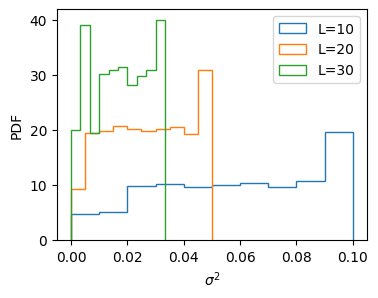

In [69]:
fig,ax=plt.subplots(figsize=(4,3))
for i in range(0,3):
    (ax.hist(var_list_short[i,0],label=f'L={L_list[i]}',histtype='step',bins=10,density=True))
ax.legend()

ax.set_xlabel('$\sigma^2$')
ax.set_ylabel('PDF')
fig.savefig('../Paper_CIPT/Fig/circ_fluct_traj_fluct_0.5.pdf',bbox_inches='tight')

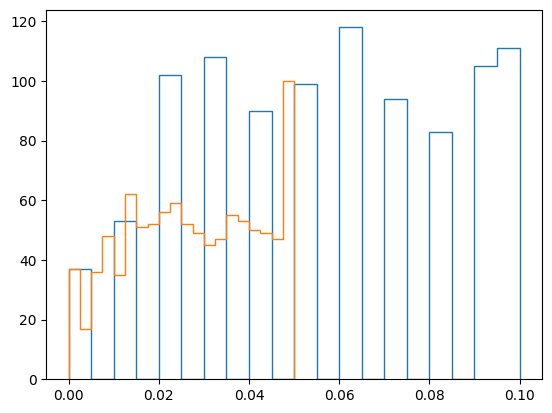

In [36]:
for i in range(2):
    (plt.hist(var_list[i,0],label=f'L={L_list[i]}',histtype='step',bins=20))

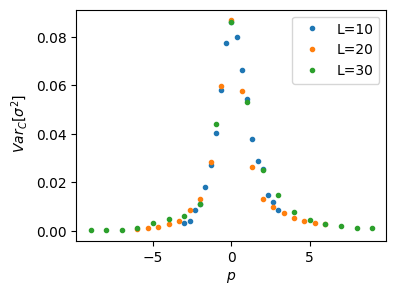

In [68]:
fig,ax=plt.subplots(figsize=(4,3))
for L_idx, L in enumerate(L_list):
    x = (p_list-0.5)
    y = var_list[L_idx].var(axis=1)
    x = (p_list-0.5)*L
    y = var_list[L_idx].var(axis=1)*L**2
    ax.plot(x,y,'.',label=f'L={L}')
ax.legend()
ax.set_xlabel('$p$')
ax.set_ylabel(r' $Var_C[\sigma^2]$')

fig.savefig('../Paper_CIPT/Fig/circ_fluct_traj_fluct_p.pdf',bbox_inches='tight')
# ax.xlabel('$(p-0.5)L$')
# ax.ylabel(r' $Var_C[\sigma^2] ~L^2$')

Text(0, 0.5, ' $Var_C[\\sigma^2]$')

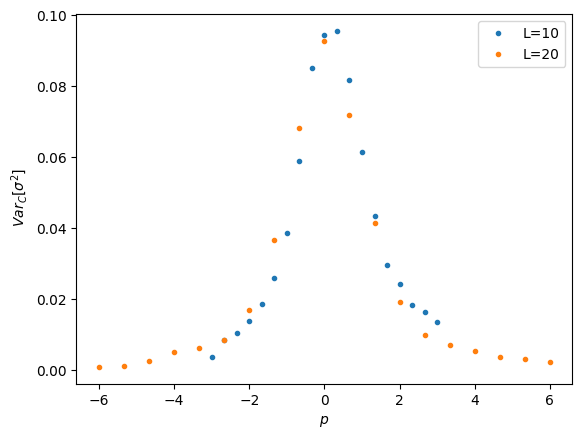

In [ ]:
for L_idx, L in enumerate(L_list):
    x = (p_list-0.5)
    y = var_list[L_idx].var(axis=1)
    x = (p_list-0.5)*L
    y = var_list[L_idx].var(axis=1)*L**2
    plt.plot(x,y,'.',label=f'L={L}')
plt.legend()
plt.xlabel('$p$')
plt.ylabel(r' $Var_C[\sigma^2]$')
# plt.xlabel('$(p-0.5)L$')
# plt.ylabel(r' $Var_C[\sigma^2] ~L^2$')

Text(0, 0.5, ' $Var_C[\\sigma^2]$')

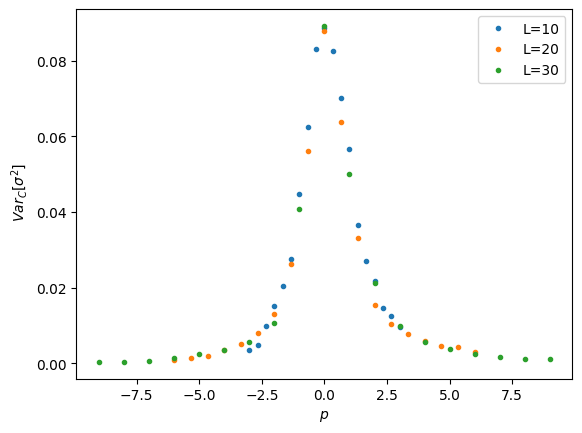

In [ ]:
for L_idx, L in enumerate(L_list):
    x = (p_list-0.5)
    y = var_list[L_idx].var(axis=1)
    x = (p_list-0.5)*L
    y = var_list[L_idx].var(axis=1)*L**2
    plt.plot(x,y,'.',label=f'L={L}')
plt.legend()
plt.xlabel('$p$')
plt.ylabel(r' $Var_C[\sigma^2]$')
# plt.xlabel('$(p-0.5)L$')
# plt.ylabel(r' $Var_C[\sigma^2] ~L^2$')

Text(0, 0.5, ' $Var_C[\\sigma^2]$')

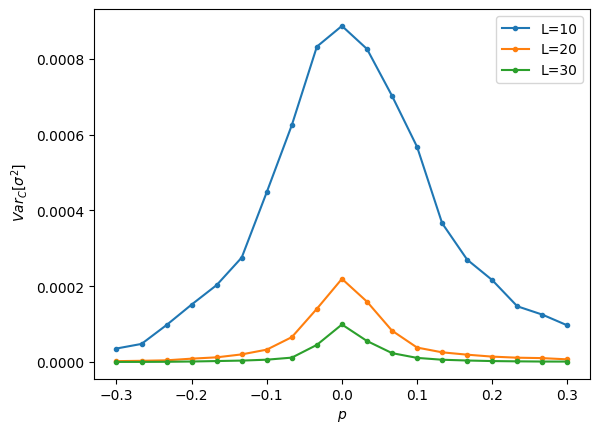

In [ ]:
for L_idx, L in enumerate(L_list):
    x = (p_list-0.5)
    y = var_list[L_idx].var(axis=1)
    # x = (p_list-0.5)*L
    # y = var_list[L_idx].var(axis=1)*L**2
    plt.plot(x,y,'.-',label=f'L={L}')
plt.legend()
plt.xlabel('$p$')
plt.ylabel(r' $Var_C[\sigma^2]$')
# plt.xlabel('$(p-0.5)L$')
# plt.ylabel(r' $Var_C[\sigma^2] ~L^2$')

In [91]:
for L_idx, L in enumerate(L_list):
    # x = (p_list-0.5)
    # y = var_list[L_idx].var(axis=1)
    x = (p_list-0.5)*L
    y = var_list[L_idx].var(axis=1)*L**2
    plt.plot(x,y,'.-',label=f'L={L}')
plt.legend()
plt.xlabel('$p$')
plt.ylabel(r' $Var_C[\sigma^2]$')
plt.xlabel('$(p-0.5)L$')
plt.ylabel(r' $Var_C[\sigma^2] ~L^2$')

[0.1,
 0.020000000000000004,
 0.07,
 0.1,
 0.1,
 0.0,
 0.03,
 0.05,
 0.060000000000000005,
 0.05,
 0.0,
 0.1,
 0.05,
 0.1,
 0.03,
 0.08,
 0.0,
 0.07,
 0.1,
 0.09000000000000001]

In [17]:
ct.T_tensor(ct.T_tensor(ct.vec,left=True))

array([[[[0., 0.],
         [0., 0.]],

        [[1., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]])

In [31]:
ct.R_tensor(ct.vec)

array([[[[0.125, 0.   ],
         [0.125, 0.   ]],

        [[0.125, 0.   ],
         [0.125, 0.   ]]],


       [[[0.125, 0.   ],
         [0.125, 0.   ]],

        [[0.125, 0.   ],
         [0.125, 0.   ]]]])

In [49]:
z=np.array([1,2,3])

In [51]:
np.roll(z,-1)

array([2, 3, 1])

In [2]:
from scipy.special import comb


In [45]:
L=20
x=np.arange(0,21)


p = comb(L,x)/2**L
sigma2=1/L-x/L**2



In [46]:
import matplotlib.pyplot as plt

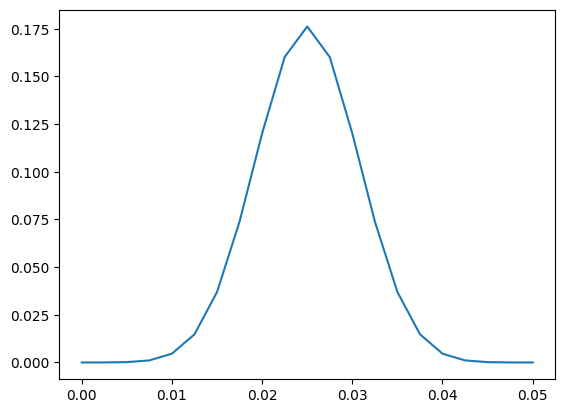

In [48]:
plt.plot(sigma2,p)

In [51]:
def pmz(sigma2,t,L,p):
    x=L/2-L**2*sigma2
    # print((t+x)/2)
    return comb( t,(t+x)/2) * p ** ((t+x)/2) * (1-p) ** ((t-x)/2)



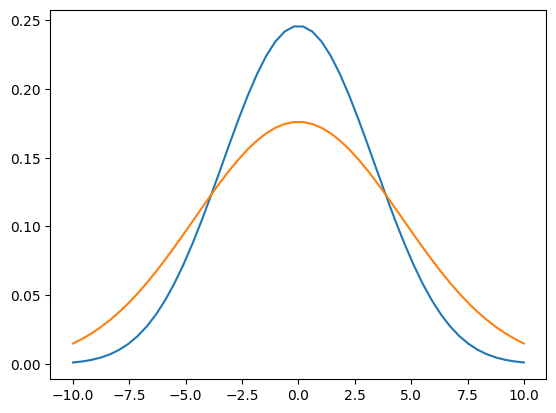

In [56]:
plt.plot(np.linspace(-10,10,),[pdf(x,t=10,p=0.5) for x in np.linspace(-10,10,)])
plt.plot(np.linspace(-10,10,),[pdf(x,t=20,p=0.5) for x in np.linspace(-10,10,)])

In [27]:
import numpy as np

In [31]:
import matplotlib.pyplot as plt

(0.0, 0.0835643918604102)

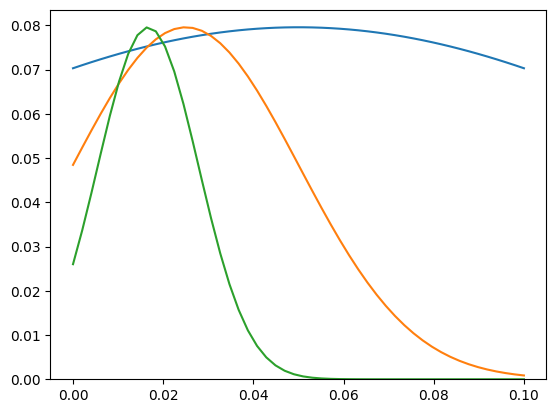

In [61]:
sigma_list = np.linspace(0,1/10)
plt.plot(sigma_list , [pmz(x,100,10,0.5) for x in sigma_list])
sigma_list = np.linspace(0,1/10)
plt.plot(sigma_list , [pmz(x,100,20,0.5) for x in sigma_list])
plt.plot(sigma_list , [pmz(x,100,30,0.5) for x in sigma_list])
plt.ylim(0,None)